#**Ensemble Methods etc**

Ensemble methods combine several ML algorithms to construct better predictive performance than a single ML algorithm. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner, thus increasing the accuracy of the model. When we try to predict the target variable using any machine learning technique, the main causes of difference in actual and predicted values are noise, variance, and bias. Ensemble helps to reduce these factors (except noise, which is irreducible error).


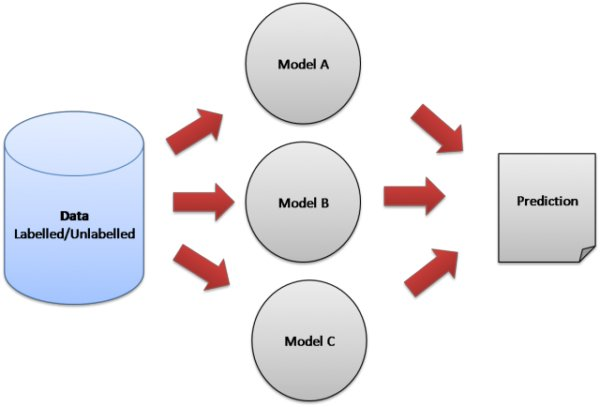

***Why we do Ensemble Learning?***

As we know that we have many reason to do Ensemble learning(Meta Machine learning).

In the group of Algorithm, Several model are simple and take less computation power and some are complex and taking more computation.

When we put the model for production, that time accuracy and computation time is most important concern.

Imagine that you have train a model with high accuracy But for real time application has no use. and in another scenario We have simple model(Simple Algorithm) may have less accuracy and not fit on data properly. In this cases, we compromise with accuracy and computation time.

To Solve this problem, We can train a model on different algorithms(Weak Learners) to get a average result(Confidence index) from them. which will help you to implement real time application with very nice accuracy.

The models that contribute to the ensemble, referred to as ensemble members, may be the same type or different types and may or may not be trained on the same training data.

***Ensemble methods greatly increase computational cost and complexity. This increase comes from the expertise and time required to train and maintain multiple models rather than a single model.***

***Reasons to use ensemble***

1. **Performance:**An ensemble can make better predictions and achieve better performance than any single contributing model.
2. **Robustness:**An ensemble reduces the spread or dispersion of the predictions and model performance.

##**1-Max Voting**

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

In [ ]:
# Without Weights
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft')

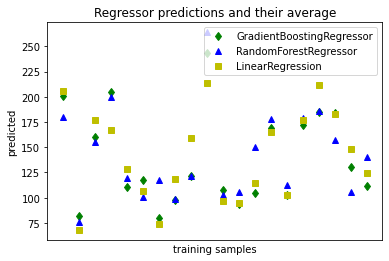

In [8]:
# With Weights
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft', weights=[2,5,1])

##**2-Averaging**

Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

In [9]:
# Averaging
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft')

clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)

y_pred=eclf.predict(X)

from sklearn.metrics import accuracy_score
s=accuracy_score(y_pred,y)
s

0.9733333333333334

##**3-Weighted Average**

This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction.

In [10]:
# Weighted Average
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)

y_pred=eclf.predict(X)

from sklearn.metrics import accuracy_score
s=accuracy_score(y_pred,y)
s

0.98

##**4-Stacking**

Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set. Below is a step-wise explanation for a simple stacked ensemble:
1. The train set is split into 10 parts.
2. A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set.
3. The base model (in this case, decision tree) is then fitted on the whole train dataset.
4. Using this model, predictions are made on the test set.
5. Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the train set and test set.
6. The predictions from the train set are used as features to build a new model.
7. This model is used to make final predictions on the test prediction set.

***What is Stacking?***

Stacking is an extension of the voting classifier or voting regressor by a higher level (blending level), which learns the best aggregation of the individual results. At the top of stacking is (at least) another classifier or regressor.
Stacking is particularly useful when the results of the individual algorithms can be very different, which is almost always the case with regression — since continuous values instead of a few classes. Stacking algorithms can even span several layers, which makes their training much more difficult.

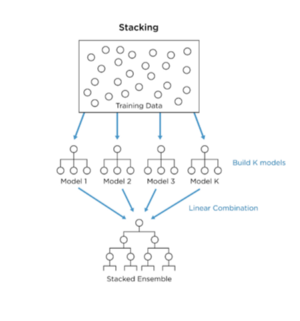

In [11]:
# Stacking
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor

estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),('knr', KNeighborsRegressor(n_neighbors=20,metric='euclidean'))]

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

final_estimator = GradientBoostingRegressor(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,random_state=42)
reg = StackingRegressor(estimators=estimators,final_estimator=final_estimator)

from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

reg.fit(X_train, y_train)

y_pred=reg.predict(X_test)

from sklearn.metrics import r2_score
s= -r2_score(y_pred,y_test)
s

0.13058766641841446

##**5-Blending**

Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. 

In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set. Here is a detailed explanation of the blending process
1. The train set is split into training and validation sets.
2. Model(s) are fitted on the training set.
3. The predictions are made on the validation set and the test set.
4. The validation set and its predictions are used as features to build a new model.
5. This model is used to make final predictions on the test and meta-features.


In [2]:
# BLENDING
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

X, y = load_iris(return_X_y=True)

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
s=accuracy_score(y_pred,y_test)
s

0.9473684210526315

##**6-Bagging**

***Bagging — The Enemy of the Variance***


Bagging, an acronym for bootstrap aggregation, creates and replaces samples from the data-set. 
In other words, each selected instance can be repeated several times in the same sample. We seem to increase our training data with bootstraps, which are each created and then used to create a classifier model. 
The final prediction is the average of all predictive models.
The most popular bagging algorithm commonly used by data scientist is the random forest based on the decision tree algorithm. 
Another useful algorithm is the pocket filling of the neighboring subspace closest to K (KNN), where basic students are based on the closest neighbor algorithm to k. We will discuss these algorithms in detail in the future.

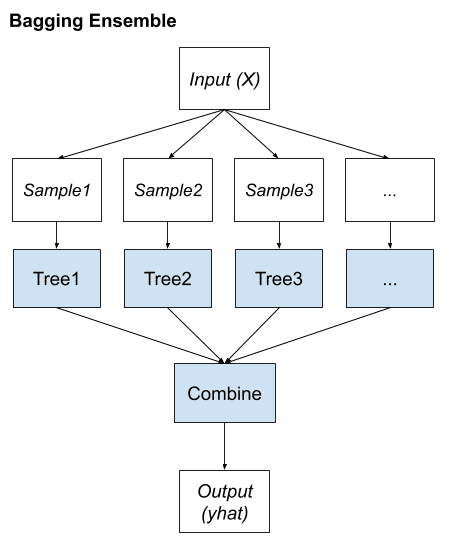

Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

1. Multiple subsets are created from the original dataset, selecting observations with replacement.
2. A base model (weak model) is created on each of these subsets.
3. The models run in parallel and are independent of each other.
4. The final predictions are determined by combining the predictions from all the models

In [3]:
# BAGGING

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

X, y = load_iris(return_X_y=True)

clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
s=accuracy_score(y_pred,y_test)
s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9473684210526315

##**7-Boosting**

***Boosting- Give the power to weak learners***

Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model. Let’s understand the way boosting works in the below steps.

1. A subset is created from the original dataset.
2. Initially, all data points are given equal weights.
3. A base model is created on this subset.
4. This model is used to make predictions on the whole dataset
5. Errors are calculated using the actual values and predicted values.
6. The observations which are incorrectly predicted, are given higher weights.
7. Another model is created and predictions are made on the dataset.
(This model tries to correct the errors from the previous model)
8. Similarly, multiple models are created, each correcting the errors of the previous model.
9. The final model (strong learner) is the weighted mean of all the models (weak learners)

The key property of boosting ensembles is the idea of correcting prediction errors. The models are fit and added to the ensemble sequentially such that the second model attempts to correct the predictions of the first model, the third corrects the second model, and so on.

It is a process that multiple weak learners(machine learning models) train and combine their output to create strong learner from it.

1. ***Prevent Under-fitting when you have less number of training data.***
2. ***Prevent Over-fitting when you have enough sample for training data-set still, it is not giving a good result on the validation data-set.***

There are many algorithms used by the data science community for classification and regression problems such as Adaboost, XGboost, Gradient Boosting, and so on.

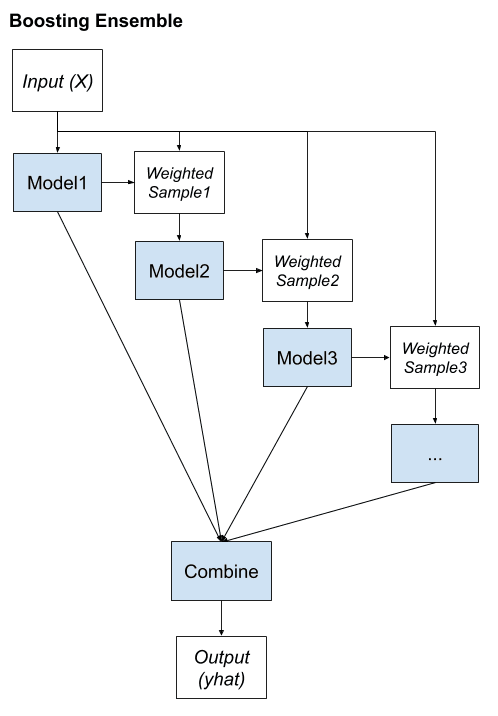



In [6]:
# BOOSTING

from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier

X, y = load_iris(return_X_y=True)

X_train, X_test,y_train,y_test= model_selection.train_test_split( X, y, test_size=0.25, random_state=1)

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
s=accuracy_score(y_pred,y_test)
s

0.9736842105263158

##**8-Random Forest**

Random Forest is another ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging meta estimator, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.

Looking at it step-by-step, this is what a random forest model does:

1. Random subsets are created from the original dataset (bootstrapping).
2. At each node in the decision tree, only a random set of features are considered to decide the best split.
3. A decision tree model is fitted on each of the subsets.
4. The final prediction is calculated by averaging the predictions from all decision trees.

Note: The decision trees in random forest can be built on a subset of data and features. Particularly, the sklearn model of random forest uses all features for decision tree and a subset of features are randomly selected for splitting at each node.

To sum up, Random forest randomly selects data points and features, and builds multiple trees (Forest) .



In [7]:
# RANDOM FOREST
from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

X, y = load_iris(return_X_y=True)

X_train, X_test,y_train,y_test= model_selection.train_test_split( X, y, test_size=0.25, random_state=1)

clf = RandomForestClassifier(max_depth=5, random_state=0)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
s=accuracy_score(y_pred,y_test)
s

0.9736842105263158

##**9-AdaBoost**

Adaptive boosting or AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

Below are the steps for performing the AdaBoost algorithm:

1. Initially, all observations in the dataset are given equal weights.
2. A model is built on a subset of data.
3. Using this model, predictions are made on the whole dataset.
4. Errors are calculated by comparing the predictions and actual values.
5. While creating the next model, higher weights are given to the data points which were predicted incorrectly.
6. Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
7. This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.

In [8]:
# ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

X_train, X_test,y_train,y_test= model_selection.train_test_split( X, y, test_size=0.25, random_state=1)

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
s=accuracy_score(y_pred,y_test)
s

0.9736842105263158

##**10-Gradient Boosting(GBM)**

Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

In [9]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

X_train, X_test,y_train,y_test= model_selection.train_test_split( X, y, test_size=0.25, random_state=1)

clf = GradientBoostingClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
s=accuracy_score(y_pred,y_test)
s

0.9736842105263158

##**11-XGBoost**

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

In [11]:
# XGBoost

from xgboost.sklearn import XGBClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

X_train, X_test,y_train,y_test= model_selection.train_test_split( X, y, test_size=0.25, random_state=1)

clf = XGBClassifier()

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
s=accuracy_score(y_pred,y_test)
s

0.9736842105263158

##**12-LightGBM**

Before discussing how Light GBM works, let’s first understand why we need this algorithm when we have so many others (like the ones we have seen above). Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.

LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern. The images below will help you understand the difference in a better way.

In [12]:
# Light GBM

from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

X_train, X_test,y_train,y_test= model_selection.train_test_split( X, y, test_size=0.25, random_state=1)

clf = LGBMClassifier()

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
s=accuracy_score(y_pred,y_test)
s

0.9736842105263158